Pool-Based Active Learning Tutorial

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from skactiveml.classifier import SklearnClassifier
from skactiveml.pool import UncertaintySampling
from skactiveml.utils import unlabeled_indices, labeled_indices, MISSING_LABEL
from skactiveml.visualization import plot_decision_boundary, plot_utilities

import warnings
mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

Data Set Generation

In [14]:
X, y_true = make_classification(n_features=2, n_redundant=0, random_state=0) # X.shape = (100,2) and y_true = (100,)

np.arange(X.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Text(0.5, 1.0, 'Data set')

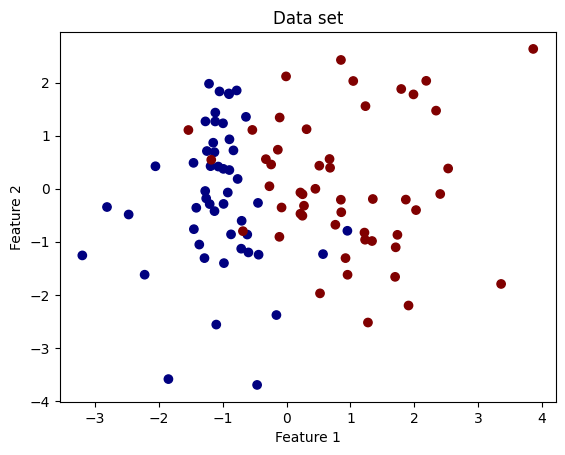

In [3]:
bound = [[min(X[:,0]), min(X[:,1])], [max(X[:,0]), max(X[:,1])]] # [[x0_min, x1_min], [x0_max, x1_max]] 2*2 __class__: list
# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='jet')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data set')

Classification

In [4]:
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL) # a numpy.ndarray; shape=100; full with nan; all the label are unknown

In [5]:
# np.unique(y_true) read the classes
clf = SklearnClassifier(LogisticRegression(), classes=np.unique(y_true))

Query Strategy

In [6]:
qs = UncertaintySampling(method='entropy', random_state=42)

Active Learning Cycle

After 2 iterations:
The accuracy score is 0.68.


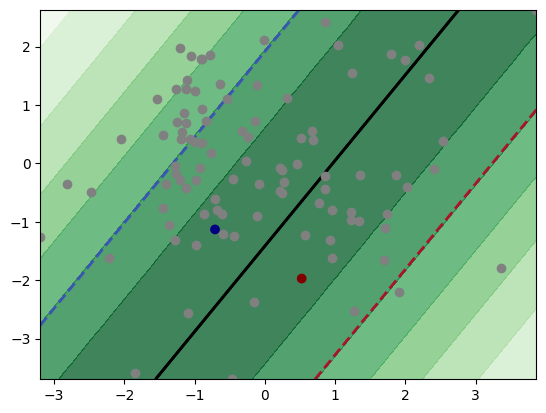

After 10 iterations:
The accuracy score is 0.95.


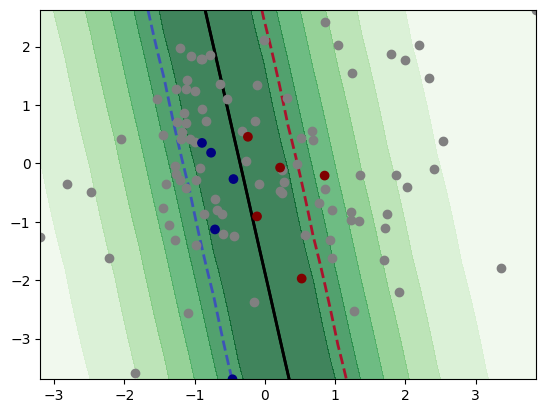

After 20 iterations:
The accuracy score is 0.94.


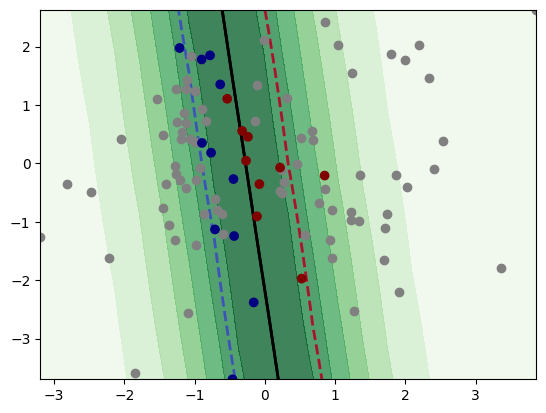

In [7]:
n_cycles = 20
clf.fit(X,y)
for c in range(n_cycles):
    query_idx = qs.query(X=X, y=y, clf=clf, batch_size=1)
    y[query_idx] = y_true[query_idx] #asking orcale for the true label
    clf.fit(X,y)

    #plotting
    unlbd_idx = unlabeled_indices(y) # from skactiveml.utils
    lbd_idx = labeled_indices(y) # from skactiveml.utils
    if len(lbd_idx) in [2, 10, 20]:
        print(f'After {len(lbd_idx)} iterations:')
        print(f'The accuracy score is {clf.score(X,y_true)}.')
        plot_utilities(qs, X=X, y=y, clf=clf, feature_bound=bound)
        plot_decision_boundary(clf, feature_bound=bound)
        plt.scatter(X[unlbd_idx,0], X[unlbd_idx,1], c='gray')
        plt.scatter(X[:,0], X[:,1], c=y, cmap='jet')
        plt.show()